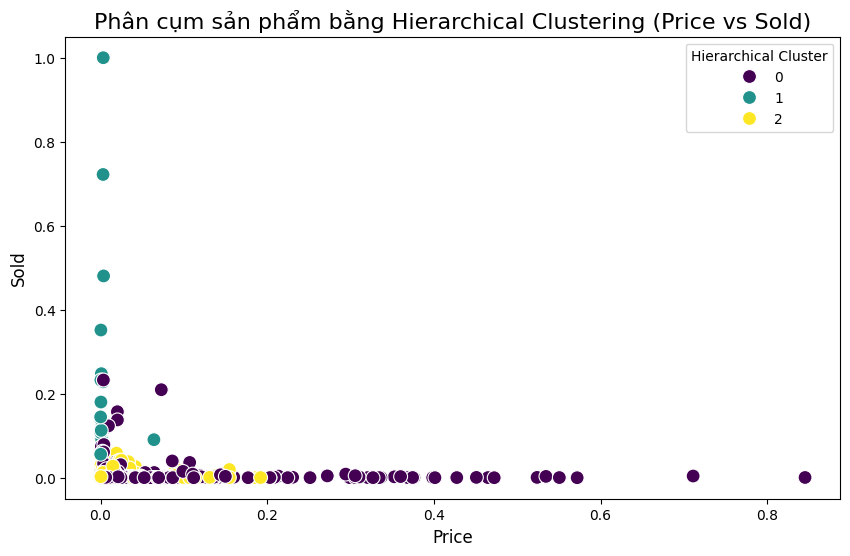

Sản phẩm bán chạy nhất trong từng cụm Hierarchical Clustering:
                                          product_name     price      sold  \
890  Giá Đỡ Laptop Nhôm Có Thể Gấp Gọn Dành Cho Mac...  0.003461  0.232648   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   
420  Ổ SSD HDD 2.5 ổ cứng SSD 120GB 240GB 1TB 512GB...  0.017787  0.059461   

     hierarchical_cluster  
890                     0  
300                     1  
420                     2  


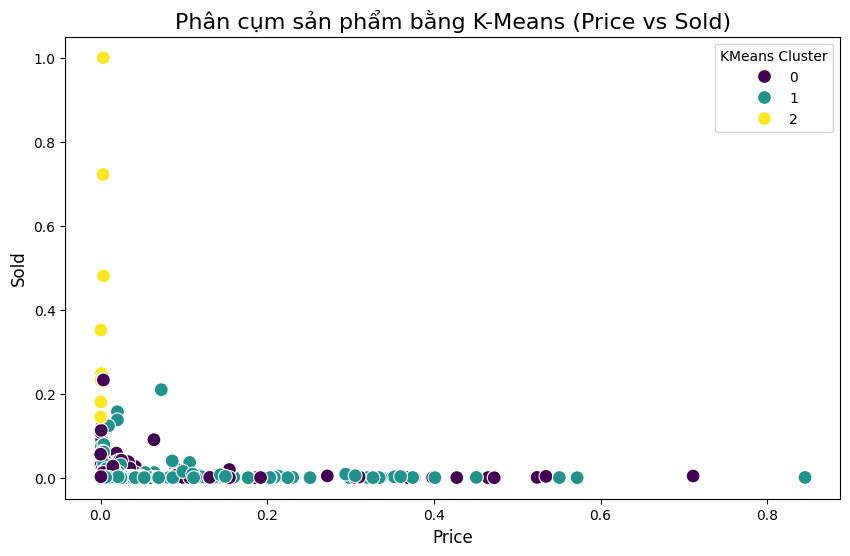

Sản phẩm bán chạy nhất trong từng cụm K-Means:
                                          product_name     price      sold  \
890  Giá Đỡ Laptop Nhôm Có Thể Gấp Gọn Dành Cho Mac...  0.003461  0.232648   
443  [ SIÊU TRỢ GIÁ ] Tai Nghe Bluetooth Không Dây ...  0.002888  0.229984   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   

     kmeans_cluster  
890               0  
443               1  
300               2  


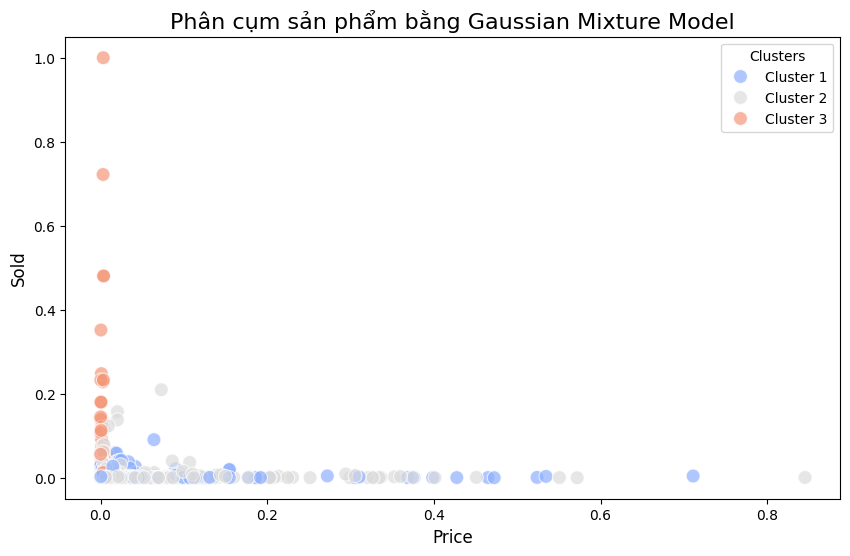

Sản phẩm bán chạy nhất trong từng cụm (GMM):
                                          product_name     price      sold  \
7    Kingspec 2.5 inche SATA3 SSD120GB 240GB 480GB ...  0.064102  0.090546   
244  Kingspec 2.5 inche Dung lượng SSD 128GB 256GB ...  0.072943  0.209556   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   

     gmm_cluster  
7              0  
244            1  
300            2  


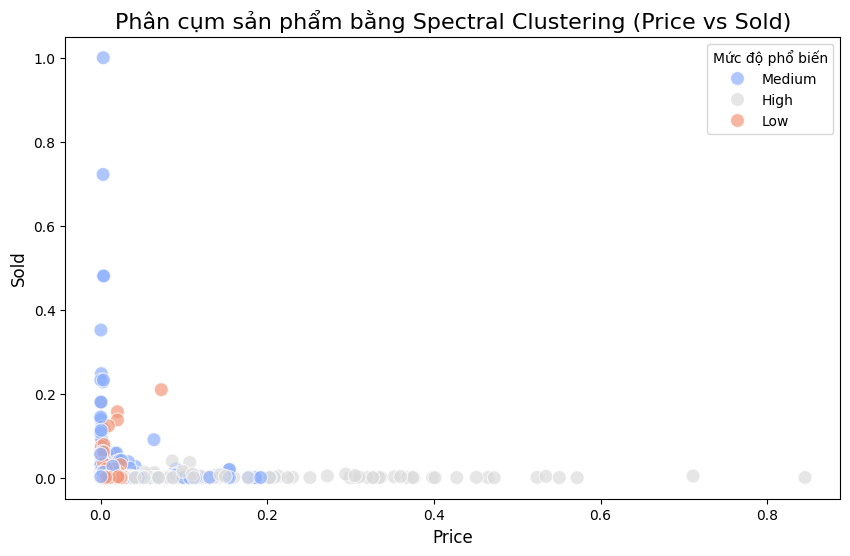

Sản phẩm bán chạy nhất trong từng cụm Spectral Clustering:
                                          product_name     price      sold  \
443  [ SIÊU TRỢ GIÁ ] Tai Nghe Bluetooth Không Dây ...  0.002888  0.229984   
300  M1 Xách Tay Bluetooth Loa Âm Nhạc Stereo Surro...  0.003295  1.000000   
946  Máy Lọc Không Khí Gia Đình Diện Tích 50m2 Màng...  0.086092  0.039922   

    popularity  
443        Low  
300     Medium  
946       High  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

# Bước 1: Tải dữ liệu
train_data = pd.read_csv("../data/processed/train_data.csv")
selected_features = ['rating', 'comment_count', 'price', 'sold']
X = train_data[selected_features]

# Bước 2: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


hierarchical = AgglomerativeClustering(n_clusters=3)  # Sử dụng 3 cụm (có thể điều chỉnh)
train_data['hierarchical_cluster'] = hierarchical.fit_predict(X_scaled)

# Vẽ biểu đồ phân cụm (Price vs Sold) - Hierarchical
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='hierarchical_cluster', palette='viridis', s=100)
plt.title('Phân cụm sản phẩm bằng Hierarchical Clustering (Price vs Sold)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='Hierarchical Cluster')
plt.show()

# Kết quả cụ thể của từng cụm (Hierarchical)
top_products_hierarchical = train_data.loc[train_data.groupby('hierarchical_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm Hierarchical Clustering:")
print(top_products_hierarchical[['product_name', 'price', 'sold', 'hierarchical_cluster']])


kmeans = KMeans(n_clusters=3, random_state=42)  # Sử dụng 3 cụm (có thể điều chỉnh)
train_data['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Vẽ biểu đồ phân cụm (Price vs Sold) - KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='kmeans_cluster', palette='viridis', s=100)
plt.title('Phân cụm sản phẩm bằng K-Means (Price vs Sold)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='KMeans Cluster')
plt.show()

# Kết quả cụ thể của từng cụm (KMeans)
top_products_kmeans = train_data.loc[train_data.groupby('kmeans_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm K-Means:")
print(top_products_kmeans[['product_name', 'price', 'sold', 'kmeans_cluster']])


gmm = GaussianMixture(n_components=3, random_state=42)  # 3 cụm
train_data['gmm_cluster'] = gmm.fit_predict(X_scaled)

# Gán nhãn cụm (GMM)
cluster_labels = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
train_data['gmm_cluster_label'] = train_data['gmm_cluster'].map(cluster_labels)

# Vẽ biểu đồ phân cụm (Price vs Sold) - GMM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='gmm_cluster_label', palette='coolwarm', s=100, alpha=0.7)
plt.title('Phân cụm sản phẩm bằng Gaussian Mixture Model', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='Clusters')
plt.show()

# Kết quả cụ thể của từng cụm (GMM)
top_products_gmm = train_data.loc[train_data.groupby('gmm_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm (GMM):")
print(top_products_gmm[['product_name', 'price', 'sold', 'gmm_cluster']])


spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors', n_neighbors=10)
train_data['spectral_cluster'] = spectral.fit_predict(X_scaled)

# Gán nhãn cụm (Spectral)
cluster_labels_spectral = {0: 'Low', 1: 'Medium', 2: 'High'}  # Gán nhãn cụm
train_data['popularity'] = train_data['spectral_cluster'].map(cluster_labels_spectral)

# Vẽ biểu đồ phân tán giữa Price và Sold - Spectral
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='price', y='sold', hue='popularity', palette='coolwarm', s=100, alpha=0.7)
plt.title('Phân cụm sản phẩm bằng Spectral Clustering (Price vs Sold)', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Sold', fontsize=12)
plt.legend(title='Mức độ phổ biến')
plt.show()

# Kết quả cụ thể của từng cụm (Spectral Clustering)
top_products_spectral = train_data.loc[train_data.groupby('spectral_cluster')['sold'].idxmax()]
print("Sản phẩm bán chạy nhất trong từng cụm Spectral Clustering:")
print(top_products_spectral[['product_name', 'price', 'sold', 'popularity']])


# Câu hỏi
**Tìm kiếm các sản phẩm bán chạy nhất trong từng phân khúc giá**

## Lợi ích khi trả lời câu hỏi
1. **Hiểu rõ nhu cầu thị trường:**  
   Việc xác định các sản phẩm bán chạy nhất trong từng phân khúc giá giúp doanh nghiệp hiểu rõ nhu cầu của khách hàng theo mức thu nhập hoặc chi tiêu. Các sản phẩm này có thể phản ánh sở thích và mức chi tiêu của các nhóm khách hàng khác nhau.

2. **Tối ưu hóa chiến lược kinh doanh:**  
   Doanh nghiệp có thể sử dụng thông tin này để tối ưu hóa chiến lược sản xuất và marketing. Sản phẩm bán chạy nhất trong từng phân khúc có thể là mục tiêu quảng cáo hoặc được cải tiến để đáp ứng nhu cầu khách hàng tốt hơn.

3. **Cân đối danh mục sản phẩm:**  
   Việc phân loại sản phẩm theo phân khúc giá và tìm ra các sản phẩm bán chạy nhất giúp doanh nghiệp cân đối danh mục sản phẩm để tối ưu hóa doanh thu trên toàn bộ phân khúc. Điều này giúp đảm bảo tất cả các phân khúc giá đều có sản phẩm hấp dẫn.

4. **Xây dựng chiến lược định giá:**  
   Dựa vào phân tích mối quan hệ giữa giá và mức độ tiêu thụ, doanh nghiệp có thể xây dựng chiến lược giá hợp lý, thu hút khách hàng và tối đa hóa lợi nhuận.

## Làm sao để trả lời câu hỏi bằng dữ liệu
1. **Phân loại các phân khúc giá:**  
   Dựa vào thuộc tính **price**, chia các sản phẩm thành các phân khúc giá như "Low", "Medium", và "High".  
   Phân khúc này có thể được xác định bằng các phương pháp như:
   - **Phương pháp thống kê:** Sử dụng tứ phân vị (quantile) hoặc các khoảng giá cố định để phân loại sản phẩm vào từng phân khúc giá.
   - **Thuật toán phân cụm:** Sử dụng các mô hình phân cụm như **KMeans**, **Gaussian Mixture Model (GMM)**, hoặc **Hierarchical Clustering** để chia sản phẩm vào các nhóm.

2. **Tìm sản phẩm bán chạy nhất trong từng phân khúc giá:**  
   Sau khi phân chia sản phẩm vào các phân khúc giá, tìm các sản phẩm có **sold** (số lượng bán) cao nhất trong mỗi phân khúc giá.
   - Sử dụng thuộc tính **product_name**, **price**, và **sold** để hiển thị thông tin về các sản phẩm bán chạy nhất trong từng phân khúc.

3. **Trình bày kết quả:**  
   - Tạo bảng dữ liệu chứa thông tin về sản phẩm bán chạy nhất theo từng phân khúc giá.
   - Sử dụng các biểu đồ như **biểu đồ thanh** hoặc **biểu đồ phân tán** để trực quan hóa kết quả, giúp người dùng dễ dàng nhận thấy các sản phẩm bán chạy nhất trong mỗi phân khúc.

## Lựa chọn mô hình tốt nhất
- **KMeans**: Mô hình phân cụm này chia dữ liệu thành các nhóm theo cách tối ưu hóa trung bình khoảng cách giữa các điểm và tâm của cụm. KMeans thường hoạt động tốt khi có các cụm đều và có thể áp dụng được trong các trường hợp phân khúc giá rõ ràng.
- **Gaussian Mixture Model (GMM)**: GMM là mô hình phân cụm xác suất, có thể linh hoạt hơn trong việc nhận dạng các cụm không có hình dạng tròn như KMeans. Mô hình này có thể hữu ích khi phân khúc giá không đồng đều.
- **Hierarchical Clustering**: Mô hình này không yêu cầu số lượng cụm trước, có thể phù hợp khi không chắc chắn về số lượng phân khúc giá. Tuy nhiên, nó có thể không hiệu quả khi dữ liệu quá lớn hoặc quá phức tạp.

Dựa vào kết quả phân cụm từ các mô hình:
- **KMeans** và **Gaussian Mixture Model (GMM)** có thể là lựa chọn tốt nếu các phân khúc giá có sự phân bố rõ ràng.
- **Hierarchical Clustering** có thể phù hợp khi số phân khúc không cố định và yêu cầu phân tích theo cấu trúc cây.

Tóm lại, **KMeans** có thể là lựa chọn đơn giản và hiệu quả nhất nếu số lượng phân khúc được xác định rõ ràng. Nếu dữ liệu có sự phân bố phức tạp hơn hoặc không đồng đều, **Gaussian Mixture Model (GMM)** sẽ là một sự lựa chọn linh hoạt hơn.
